In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import sineModel as SM

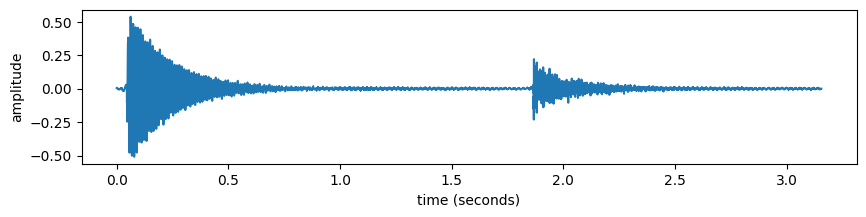

In [2]:
inputFile = '../sounds/bendir.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

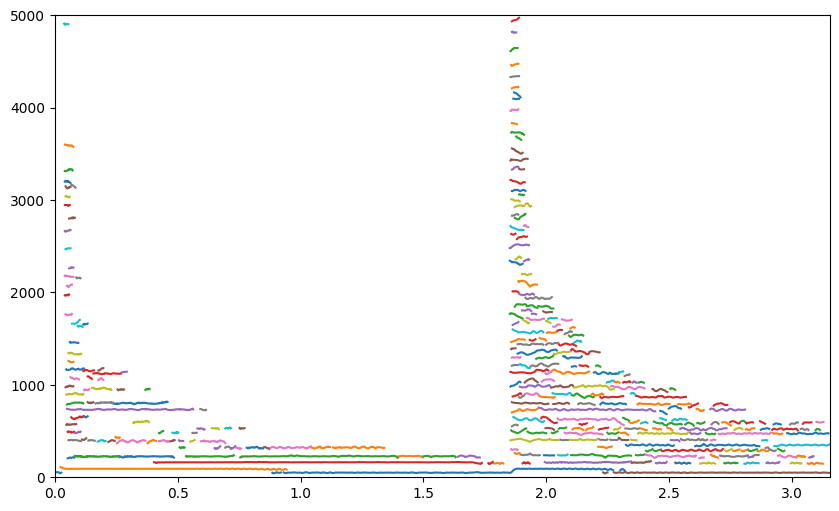

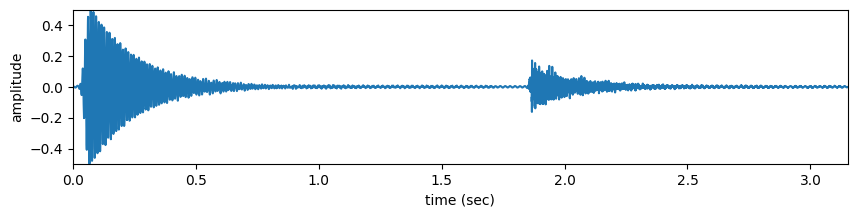

In [3]:
window="hamming",
M=2001
N=2048
t=-80
minSineDur=0.02
maxnSines=150
freqDevOffset=10
freqDevSlope=0.001

# size of fft used in synthesis
Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128

w = get_window(window, M)
tfreq, tmag, tphase = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
y = SM.sineModelSynth(tfreq, tmag, tphase, Ns, H, fs)

plt.figure(figsize=(10, 6))
maxplotfreq = 5000.0
numFrames = tfreq.shape[0]
frmTime = H * np.arange(numFrames) / float(fs)
tfreq[tfreq <= 0] = np.nan
plt.plot(frmTime, tfreq)
plt.axis([0, x.size / float(fs), 0, maxplotfreq])
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))